In [ ]:
import numpy as np
from scipy.ndimage import rotate
import os
from PIL import Image
import math
import cv2 as cv
from google.colab import drive
import cv2
import skimage
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
!pip install opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17

In [ ]:
drive.mount("/content/drive", force_remount=True)
%ls
%cd '/content/drive/MyDrive/Colab Notebooks/V&P/assignment'
%ls

Mounted at /content/drive
drive/  sample_data/
/content/drive/MyDrive/Colab Notebooks/V&P/assignment
2.jfif                   exercise_11.ipynb  im4.jpg
7.jfif                   exercise_12.ipynb  ImageProcessing_assignment.pdf
8_1im.png                exercise_13.ipynb  isaac.png
8_2im.png                exGenerator.pyc    Lenna.png
BoW.py                   frame1.png         Photos/
Dataset/                 gen_img/           simple.jpg
Distorted/               im1.jpg            templateAssignment.zip
ExampleGeneration.ipynb  im2.jpg            try1-7Exercise.ipynb
exercise_10.ipynb        im3.jpg


Text(0.5, 1.0, '4th frame')

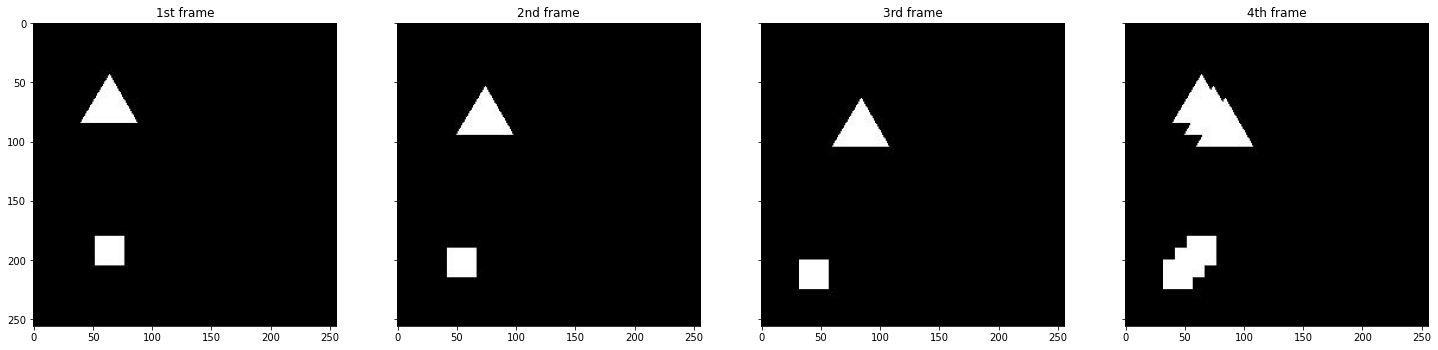

In [ ]:
def load_images():
  img_1 = cv2.imread("./im1.jpg")
  img_2 = cv2.imread("./im2.jpg")
  img_3 = cv2.imread("./im3.jpg")
  img_4 = cv2.imread("./im4.jpg")
  images = [img_1,img_2,img_3,img_4]
  return images

images = load_images()


# plot frames
fig, ax = plt.subplots(ncols=4, figsize=(25, 10), sharex=True, sharey=True)
ax[0].imshow(images[0], cmap=plt.cm.gray)
ax[0].set_title('1st frame')
ax[1].imshow(images[1], cmap=plt.cm.gray)
ax[1].set_title('2nd frame')
ax[2].imshow(images[2], cmap=plt.cm.gray)
ax[2].set_title('3rd frame')
ax[3].imshow(images[3], cmap=plt.cm.gray)
ax[3].set_title('4th frame')


segmented image n°1


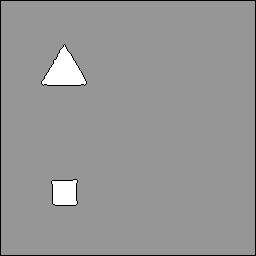


segmented image n°2


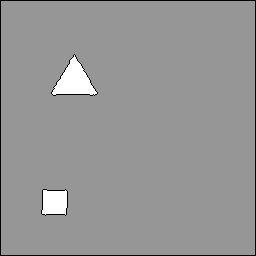


segmented image n°3


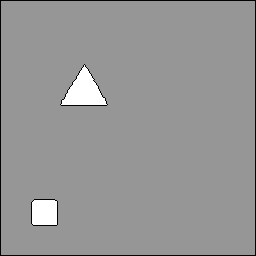


segmented image n°4


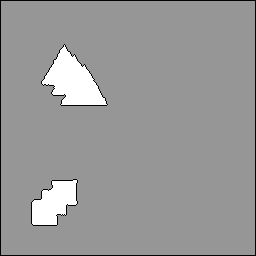

In [ ]:
import cv2
import numpy as np

load_images()

def segmentation(img, index):
  # make the whole computation about tha markers based on the grayscale image, then use the 3 channels
  # image to highlight them.
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value
  ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # marker building

  # foreground area definition
  fg = cv2.erode(thresh,None,iterations = 2)
  # background area definition
  bgt = cv2.dilate(thresh,None,iterations = 3)
  # values grater than 1, equal 150 
  ret,bg = cv2.threshold(bgt,1,150,cv.THRESH_BINARY_INV)
  # 
  marker = cv2.add(fg,bg)
  marker = np.int32(marker)
  # watersheld application
  cv2.watershed(img,marker)
  result = cv2.convertScaleAbs(marker)

  print("\nsegmented image n°{}".format(index))
  cv2_imshow(result)
  cv2.imwrite("gen_img/e11_seg{}.jpg".format(index), result)



for i,image in enumerate(images):
  segmentation(image,i+1)

In [ ]:
def plot_quiver(ax, flow, spacing, margin=0, **kwargs):
    """Plots less dense quiver field.

    Args:
        ax: Matplotlib axis
        flow: motion vectors
        spacing: space (px) between each arrow in grid
        margin: width (px) of enclosing region without arrows
        kwargs: quiver kwargs (default: angles="xy", scale_units="xy")
    """
    h, w, *_ = flow.shape

    nx = int((w - 2 * margin) / spacing)
    ny = int((h - 2 * margin) / spacing)

    x = np.linspace(margin, w - margin - 1, nx, dtype=np.int64)
    y = np.linspace(margin, h - margin - 1, ny, dtype=np.int64)

    flow = flow[np.ix_(y, x)]
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    kwargs = {**dict(angles="xy", scale_units="xy"), **kwargs}
    ax.quiver(x, y, u, v, **kwargs)

    ax.set_ylim(sorted(ax.get_ylim(), reverse=True))
    ax.set_aspect("equal")


first optical flow


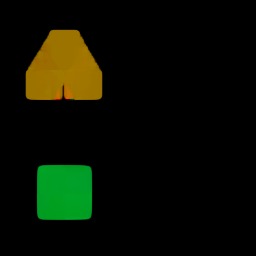

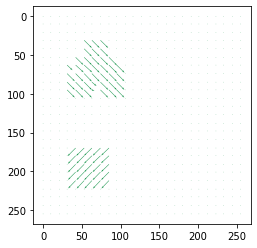

second optical flow


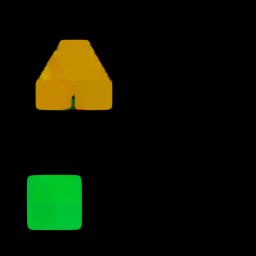

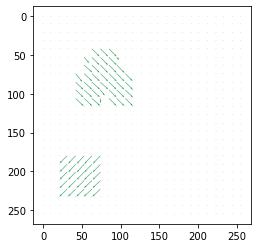

third optical flow


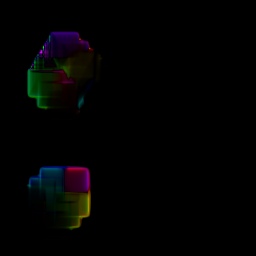

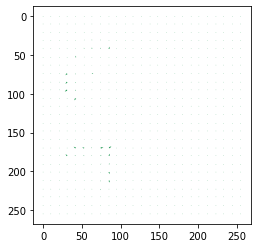

In [ ]:
def compute_optical_flow(img_1, img_2, num):
  frame_1 = cv.cvtColor(img_1,cv.COLOR_BGR2GRAY)
  frame_2 = cv.cvtColor(img_2,cv.COLOR_BGR2GRAY)

  flow = cv.calcOpticalFlowFarneback(frame_1,frame_2,None, 0.5, 2, 25, 5, 5, 1.1, 0)
  """
  0.5 -> image pyramid or simple image scale
  2 -> is the number of pyramid layers. 1 means that flow is calculated only from the previous image. 
  25 ->is window size. Flow is computed over the window larger value is more robust to the noise. 
  5 -> mean number of iteration of the algorithm
  5 -> polynomial degree expansion 
  1.1 -> standard deviation used to smooth used derivatives
  0 -> flag
  """
  # uv enconding representation
  hsv = np.zeros_like(img_1)
  hsv[...,1] = 255

  next = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
  mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
  hsv[...,0] = ang*180/np.pi/2
  hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
  uv_enc = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

  cv2_imshow(uv_enc)
  # cv2.imwrite("gen_img/e11_flowUV{}.jpg".format(num), uv_enc)

  fig, ax = plt.subplots()
  plot_quiver(ax, flow, spacing=10, scale=1, color="#229954")
  plt.show()
  fig.savefig("gen_img/e11_flowVectors{}.jpg".format(num))
  

print("first optical flow")
compute_optical_flow(images[0], images[1], 1)
print("second optical flow")
compute_optical_flow(images[1], images[2], 2)
print("third optical flow")
compute_optical_flow(images[2], images[3], 3)
  